<a href="https://colab.research.google.com/github/juacardonahe/Curso_NLP/blob/main/2_Mecanismos_Transformers/2.2_AttentionMechanisms/2_2_1_IntroAttentionMechanism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/juacardonahe/Curso_NLP/refs/heads/main/data/UnFieldB.png" width="40%">

# **Natural Language Procesing (NLP)**
### Departamento de Ingeniería Eléctrica, Electrónica y Computación
#### Universidad Nacional de Colombia - Sede Manizales

#### Created by: Juan José Cardona H.
#### Reviewed by: Diego A. Perez

#**2.2.1 - Introduction to Attention Mechanism**
The idea is to create a new context vector every timestep of the decoder which attends differently to the encoded sequence. Attention acts as a bridge between the encoder and decoder, allowing the decoder to access all encoder hidden states rather than relying solely on the final one. With this mechanism, the model can focus on relevant parts of the input sequence, enabling it to align input segments with their corresponding output segments. This alignment process helps the model handle long input sequences more effectively.

##**0. Prepare hidden states**

In [2]:
import torch
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 0: Prepare hidden states
encoder_hidden_states = torch.tensor([
    [0.0, 1.0, 1.0],
    [5.0, 0.0, 1.0],
    [1.0, 1.0, 0.0],
    [0.0, 5.0, 1.0]
])

# Updated decoder hidden state
decoder_hidden_state = torch.tensor([10.0, 5.0, 10.0])

##**1. Obtain a score for every encoder hidden state**
In this example, the score function is a dot product between the decoder and encoder hidden states

In [3]:
# Step 1: Compute attention scores using dot product
attention_scores = torch.matmul(encoder_hidden_states, decoder_hidden_state)
print("Attention Scores:", attention_scores.tolist())

Attention Scores: [15.0, 60.0, 15.0, 35.0]


##**2. Run all the scores through a softmax layer**

In [4]:
# Step 2: Softmax the scores to get attention weights
attention_weights = F.softmax(attention_scores, dim=0)
print("Attention Weights (softmaxed scores):", attention_weights.tolist())

Attention Weights (softmaxed scores): [2.862518609581133e-20, 1.0, 2.862518609581133e-20, 1.3887943746404563e-11]


##**3. Multiply each encoder hidden state by its softmaxed score**

In [5]:
# Step 3: Multiply each encoder hidden state by its attention weight
alignment_vectors = encoder_hidden_states * attention_weights.unsqueeze(1)

##**4. Sum up the alignment vectors**

In [6]:
# Step 4: Sum the alignment vectors to get the context vector
context_vector = alignment_vectors.sum(dim=0)  # Shape: (3,)
print("Context Vector:", context_vector.tolist())

Step 4 - Context Vector: [5.0, 6.943971786466108e-11, 1.0]


#**Table for visualization**

In [8]:
# Create a table for visualization
encoder_list = encoder_hidden_states.tolist()
scores_list = attention_scores.tolist()
weights_list = attention_weights.tolist()
alignment_list = alignment_vectors.tolist()

data = {
    "encoder": encoder_list,
    "score": [round(s, 2) for s in scores_list],
    "score^": [round(w, 2) for w in weights_list],
    "alignment": [[round(v, 2) for v in align] for align in alignment_list],
}

df = pd.DataFrame(data)
print("\nStep-by-Step Attention Mechanism Table:")
print(df.to_string(index=False))


Step-by-Step Attention Mechanism Table:
        encoder  score  score^       alignment
[0.0, 1.0, 1.0]   15.0     0.0 [0.0, 0.0, 0.0]
[5.0, 0.0, 1.0]   60.0     1.0 [5.0, 0.0, 1.0]
[1.0, 1.0, 0.0]   15.0     0.0 [0.0, 0.0, 0.0]
[0.0, 5.0, 1.0]   35.0     0.0 [0.0, 0.0, 0.0]


#**Attention distribution**

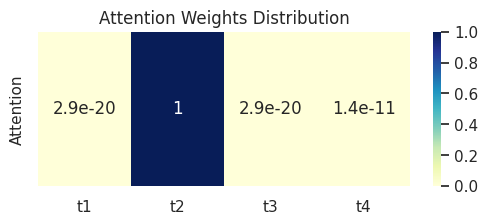

In [9]:
#Visualize attention distribution
sns.set()
plt.figure(figsize=(6, 2))
sns.heatmap(attention_weights.unsqueeze(0).numpy(), annot=True, cmap="YlGnBu",
            xticklabels=["t1", "t2", "t3", "t4"], yticklabels=["Attention"])
plt.title("Attention Weights Distribution")
plt.show()